In [9]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def preprocess_data(file_path):
#     print(file_path)
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tfidf_transform(reviews):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topics(lda, vectorizer, text, n_topics=5):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    return top_topic_indices


path = 'processed_reviews'
file_suffix = '_130_reviews.csv'

for file in os.listdir(path):
    if file.endswith(file_suffix):
        file_path = os.path.join(path, file)
        df = preprocess_data(file_path)
        tfidf_matrix, vectorizer = tfidf_transform(df['review'])
        lda = perform_lda(tfidf_matrix)

        search_string = 'graphics'
        top_topics_list = top_topics(lda, vectorizer, search_string)
        print(f"Top {len(top_topics_list)} topics for '{search_string}' in {file}: {top_topics_list}")



Top 5 topics for 'graphics' in appid_130_reviews.csv: [9 8 3 7 1]


In [3]:
df['review']

Series([], Name: review, dtype: object)

In [7]:
print(top_topics_list)

[6 3 7 2 8]


In [13]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tfidf_transform(reviews):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topic_words(lda, vectorizer, text, n_topics=5, n_words=10):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []

    for topic_idx in top_topic_indices:
        words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-n_words-1:-1]]
        topic_words.append(words)

    return top_topic_indices, topic_words

def main():
    path = 'processed_reviews'
    file_suffix = '_130_reviews.csv'
    
    for file in os.listdir(path):
        if file.endswith(file_suffix):
            file_path = os.path.join(path, file)
            
            df = preprocess_data(file_path)
            tfidf_matrix, vectorizer = tfidf_transform(df['review'])
            lda = perform_lda(tfidf_matrix)
            
            search_string = 'story'
            top_topics_indices, top_topic_words_list = top_topic_words(lda, vectorizer, search_string)
            
            for idx, words in zip(top_topics_indices, top_topic_words_list):
                print(f"Topic {idx}: {', '.join(words)}")

if __name__ == '__main__':
    main()

Topic 3: 10, amazing, love, gg, game, fucking, school, sequel, barney, fps
Topic 0: yes, gordon, beer, owes, freeman, barney, man, hate, game, cascade
Topic 7: sweet, short, simulator, excellent, care, grind, refund, expands, scratch, shifted
Topic 5: good, game, short, pretty, fun, epic, dlc, meh, really, mod
Topic 1: half, life, game, good, short, opposing, force, like, great, play


In [ ]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

nltk.download('punkt')

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tokenize_and_stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def tfidf_transform(reviews):
    vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topic_words(lda, vectorizer, text, n_topics=5, n_words=10):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []

    for topic_idx in top_topic_indices:
        words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-n_words-1:-1]]
        topic_words.append(words)

    return top_topic_indices, topic_words

def main():
    path = 'processed_reviews'
    file_suffix = '_130_reviews.csv'
    
    for file in os.listdir(path):
        if file.endswith(file_suffix):
            file_path = os.path.join(path, file)
            
            df = preprocess_data(file_path)
            tfidf_matrix, vectorizer = tfidf_transform(df['review'])
            lda = perform_lda(tfidf_matrix)
            
            search_string = 'graphics'
            top_topics_indices, top_topic_words_list = top_topic_words(lda, vectorizer, search_string)
            
            for idx, words in zip(top_topics_indices, top_topic_words_list):
                print(f"Topic {idx}: {', '.join(words)}")

if __name__ == '__main__':
    main()


In [15]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbont\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\tbont\AppData\Local\Temp\ipykernel_15028\2277180306.py:17: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


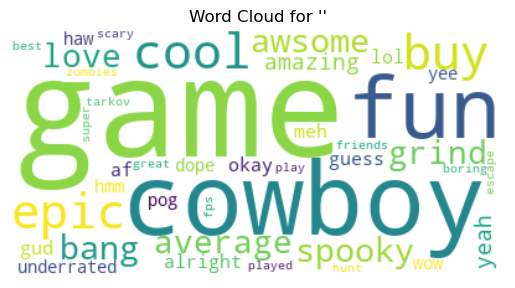

Elapsed time: 28.47 seconds


In [36]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')

import timeit


def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tokenize_and_stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def tfidf_transform(reviews):
#     vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topic_words(lda, vectorizer, text, n_topics=5, n_words=10):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []

    for topic_idx in top_topic_indices:
        words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-n_words-1:-1]]
        topic_words.append(words)

    return top_topic_indices, topic_words

def display_wordcloud(topic_words_list, search_string):
    all_words = ' '.join([' '.join(words) for words in topic_words_list])
    wordcloud = WordCloud(background_color='white').generate(all_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{search_string}'")
    plt.show()

def main():
    start_time = timeit.default_timer()
    path = 'processed_reviews'
    file_suffix = '_594650_reviews.csv'
    
    for file in os.listdir(path):
        if file.endswith(file_suffix):
            file_path = os.path.join(path, file)
            
            df = preprocess_data(file_path)
            tfidf_matrix, vectorizer = tfidf_transform(df['review'])
            lda = perform_lda(tfidf_matrix)
            
            search_string = ''
            top_topics_indices, top_topic_words_list = top_topic_words(lda, vectorizer, search_string)
            
            display_wordcloud(top_topic_words_list, search_string)
    elapsed_time = timeit.default_timer() - start_time
    print(f"Elapsed time: {elapsed_time:.2f} seconds")
if __name__ == '__main__':
    main()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbont\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\tbont\AppData\Local\Temp\ipykernel_15028\1738858184.py:15: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


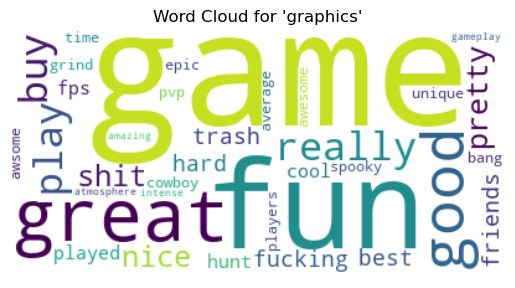

Sentiment score for 'graphics' in appid_594650_reviews.csv: 0.07407466605830969


In [38]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

nltk.download('punkt')

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tokenize_and_stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def tfidf_transform(reviews):
#     vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topic_words(lda, vectorizer, text, n_topics=5, n_words=10):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []

    for topic_idx in top_topic_indices:
        words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-n_words-1:-1]]
        topic_words.append(words)

    return top_topic_indices, topic_words

def display_wordcloud(topic_words_list, search_string):
    all_words = ' '.join([' '.join(words) for words in topic_words_list])
    wordcloud = WordCloud(background_color='white').generate(all_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{search_string}'")
    plt.show()

def sentiment_analysis(text):
    text_blob = TextBlob(text)
    sentiment_score = text_blob.sentiment.polarity
    return sentiment_score

def main():
    path = 'processed_reviews'
    file_suffix = '_594650_reviews.csv'
    
    for file in os.listdir(path):
        if file.endswith(file_suffix):
            file_path = os.path.join(path, file)
            
            df = preprocess_data(file_path)
            tfidf_matrix, vectorizer = tfidf_transform(df['review'])
            lda = perform_lda(tfidf_matrix)
            
            search_string = 'graphics'
            top_topics_indices, top_topic_words_list = top_topic_words(lda, vectorizer, search_string)
            
            display_wordcloud(top_topic_words_list, search_string)
            
            collective_review = ' '.join(df['review'])
            sentiment_score = sentiment_analysis(collective_review)
            print(f"Sentiment score for '{search_string}' in {file}: {sentiment_score}")

if __name__ == '__main__':
    main()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tbont\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\tbont\AppData\Local\Temp\ipykernel_15028\3381144485.py:15: DtypeWarning: Columns (6,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Topic 0: hate, shoot, bad, simulator, yeehaw, suck, sucks, aight, game, 10 (Sentiment: 0.10)
Topic 8: best, game, friends, fun, play, played, hunt, games, great, fps (Sentiment: 0.08)
Topic 3: game, play, just, like, fun, good, great, players, time, really (Sentiment: 0.07)
Topic 1: game, awesome, great, fun, unique, pvp, gameplay, intense, atmosphere, amazing (Sentiment: 0.17)
Topic 5: cool, cowboy, epic, buy, spooky, bang, game, awsome, average, grind (Sentiment: 0.04)


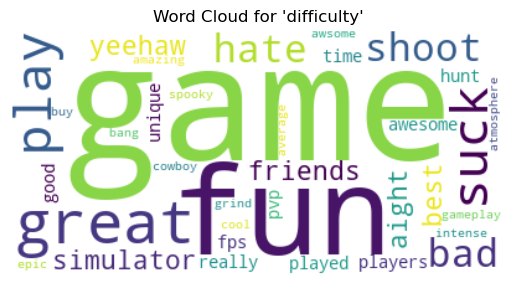

In [45]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

nltk.download('punkt')

def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df[['recommendationid', 'language', 'review', 'voted_up']]
    df = df[df['language'] == 'english']
    df['review'] = df['review'].astype(str)
    return df

def tokenize_and_stem(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

def tfidf_transform(reviews):
#     vectorizer = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english')
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(reviews)
    return tfidf_matrix, vectorizer

def perform_lda(tfidf_matrix, n_topics=10):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(tfidf_matrix)
    return lda

def top_topic_words(lda, vectorizer, text, n_topics=5, n_words=10):
    text_tfidf = vectorizer.transform([text])
    topic_distribution = lda.transform(text_tfidf)
    top_topic_indices = topic_distribution.argsort()[0][-n_topics:]
    
    feature_names = vectorizer.get_feature_names_out()
    topic_words = []

    for topic_idx in top_topic_indices:
        words = [feature_names[i] for i in lda.components_[topic_idx].argsort()[:-n_words-1:-1]]
        topic_words.append(words)

    return top_topic_indices, topic_words

def sentiment_score(topic_indices, reviews, search_string):
    sentiment_scores = []
    for topic_idx in topic_indices:
        topic_reviews = reviews[reviews['topic'] == topic_idx]
        topic_reviews = topic_reviews[topic_reviews['review'].str.contains(search_string)]
        polarities = [TextBlob(review).sentiment.polarity for review in topic_reviews['review']]
        avg_polarity = sum(polarities) / len(polarities) if polarities else 0
        sentiment_scores.append(avg_polarity)
    return sentiment_scores

def display_wordcloud(topic_words_list, search_string):
    all_words = ' '.join([' '.join(words) for words in topic_words_list])
    wordcloud = WordCloud(background_color='white').generate(all_words)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{search_string}'")
    plt.show()

def main():
    path = 'processed_reviews'
    file_suffix = '_594650_reviews.csv'
    
    for file in os.listdir(path):
        if file.endswith(file_suffix):
            file_path = os.path.join(path, file)
            
            df = preprocess_data(file_path)
            tfidf_matrix, vectorizer = tfidf_transform(df['review'])
            lda = perform_lda(tfidf_matrix)
            
            search_string = 'difficulty'
            top_topics_indices, top_topic_words_list = top_topic_words(lda, vectorizer, search_string)
            
            df['topic'] = lda.transform(tfidf_matrix).argmax(axis=1)
            topic_sentiment_scores = sentiment_score(top_topics_indices, df, search_string)
            for idx, words, sentiment in zip(top_topics_indices, top_topic_words_list, topic_sentiment_scores):
                print(f"Topic {idx}: {', '.join(words)} (Sentiment: {sentiment:.2f})")
            display_wordcloud(top_topic_words_list, search_string)
if __name__ == '__main__':
    main()

In [ ]:
for each csv file in 'processed_reviews' with the suffix '_reviews.csv', 
select these columns 'recommendationid', 'language', 'review', 'voted_up', 
then select only 'english' from the  'language' column, 
define the 'review' column astype(str), 
then perform a tf-idf transformation on the text data in 'review', then perform LDA topic modeling on the tf-idf matrix. For any given csv file, write a function that takes a string (e.g. graphics) and list out top 5 topics that show up based on the topics that was gathered from the LDA model.